In [2]:
# !pip install keras-vis

In [1]:
from random import randint
import matplotlib.pylab as plt 
import numpy as np
import glob,rasterio,os,sys
from rasterio.plot import show
from tensorflow.keras import models
from rasterio.plot import reshape_as_image
from tensorflow.keras.models import Sequential, Model

2023-03-17 10:53:44.331203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib::/usr/lib/jvm/java-11-openjdk-amd64/lib/server:/opt/hadoop/lib/native:/usr/local/lib/R/lib:/usr/local/grass82/lib
2023-03-17 10:53:44.331216: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
os.chdir("/home/jovyan/MSC_Thesis/MSc_Thesis_2023")
out_dir = "Output/feature_maps/"

In [3]:
model_id = "aanaxs4g" # With mask
# model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]

# print(model_path)
cnn_model = models.load_model(model_path)

2023-03-17 10:53:49.107293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib::/usr/lib/jvm/java-11-openjdk-amd64/lib/server:/opt/hadoop/lib/native:/usr/local/lib/R/lib:/usr/local/grass82/lib
2023-03-17 10:53:49.107352: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-17 10:53:49.107420: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adb88a00ea0a): /proc/driver/nvidia/version does not exist
2023-03-17 10:53:49.107967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

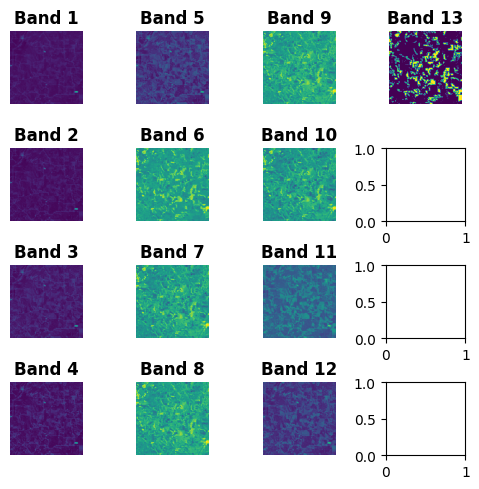

In [4]:
#Input
file = rasterio.open('Input/sentinel/patches_256/Iowa_July_1_31/test/Iowa_2021_july_1280-3072.tif')

fig, ax = plt.subplots(4,4,figsize=(5,5))

col = 0 
row = 0
for i in range(1,file.count+1):
#     print(row,col)
    
    show((file,i),ax = ax[row,col],title = "Band "+str(i))
    ax[row,col].axis("off")
    row+=1
    if i >= 4 and i %4==0:
        row = 0
        col+=1
#     col+=1
plt.tight_layout()

In [5]:
# from vis.visualization import visualize_saliency
# from vis.utils import utils
# from keras import activations

In [13]:
# def get_feature_maps(model, layer_id, input_image):
#     model_ = Model(inputs=[model.input], 
#                    outputs=[model.layers[layer_id].output])
#     return model_.predict(np.expand_dims(input_image, 
#                                          axis=0))[0,:,:,:].transpose((2,0,1))

# def plot_features_map(img_idx=None, layer_idx=[0, 2, 4, 6, 8, 10, 12, 16], 
#                       x_test=x_test, ytest=ytest, cnn=cnn):
#     if img_idx == None:
#         img_idx = randint(0, ytest.shape[0])
#     input_image = x_test[img_idx]
#     fig, ax = plt.subplots(3,3,figsize=(10,10))
#     ax[0][0].imshow(input_image)
#     ax[0][0].set_title('original img id {} - {}'.format(img_idx, 
#                                                         labels[ytest[img_idx][0]]))
#     for i, l in enumerate(layer_idx):
#         feature_map = get_feature_maps(cnn_model, l, input_image)
#         ax[(i+1)//3][(i+1)%3].imshow(feature_map[:,:,0])
#         ax[(i+1)//3][(i+1)%3].set_title('layer {} - {}'.format(l, 
#                                                                cnn.layers[l].get_config()['name']))
#     return img_idx

# labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# img_idx = plot_features_map()

# With Masking

In [6]:
cnn_model.inputs

[<KerasTensor: shape=(None, 256, 256, 13) dtype=float32 (created by layer 'conv2d_input')>]

In [7]:
cnn_model.layers

In [8]:
outputs = cnn_model.layers[0].output
model = Model(inputs=cnn_model.inputs, outputs=outputs)

In [9]:
img = reshape_as_image(file.read())
img.shape

(256, 256, 13)

In [10]:
# get feature map for first hidden layer
img_batch = np.expand_dims(img, axis=0)
feature_maps = model.predict(img_batch)

1/1 [==============================] - 0s 87ms/step


In [11]:
feature_maps.shape

(1, 254, 254, 32)

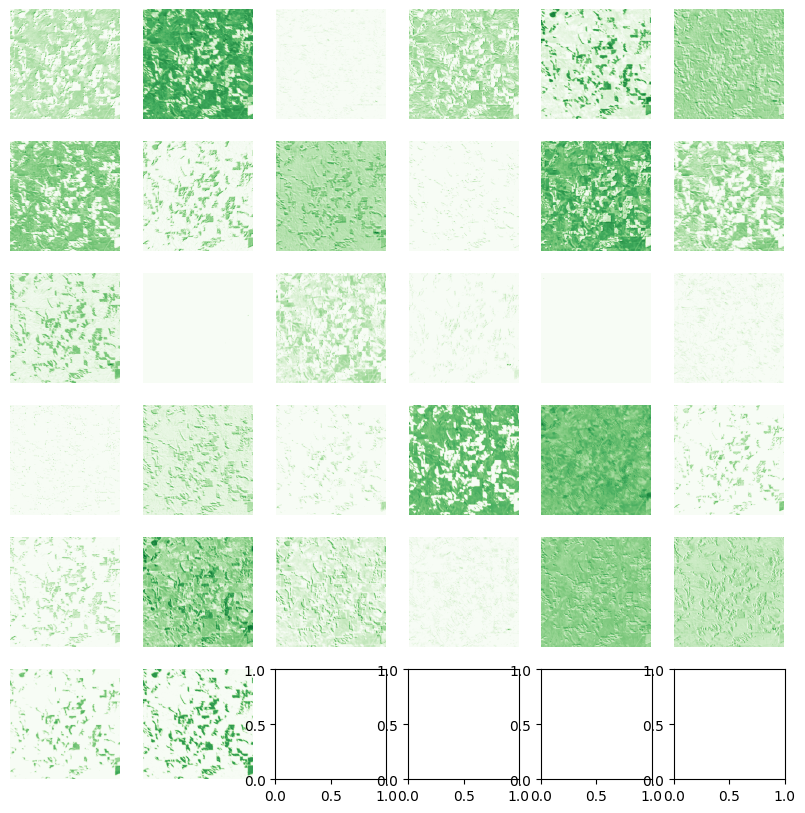

In [12]:
nrows = 6
ncols = 6
x_index = 0
y_index = 0
count = 0
fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(32):
    # ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens",vmin = feature_maps[0].min(),vmax=feature_maps[0].max())
    ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens")

    ax[x_index,y_index].axis("off")
    y_index += 1
    # print(x_index,y_index)
    if y_index >= 6:
        y_index =0
        x_index+=1

In [13]:
output_list = [i.output for i in cnn_model.layers]
model = Model(inputs=cnn_model.inputs, outputs=output_list)
# get feature map for first hidden layer
img_batch = np.expand_dims(img, axis=0)
feature_maps = model.predict(img_batch)
for layer in feature_maps:
    print(layer.shape)

1/1 [==============================] - 0s 65ms/step
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)
(1, 62, 62, 64)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 57600)
(1, 64)
(1, 32)
(1, 1)


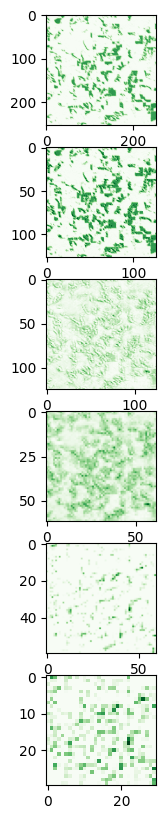

In [14]:
fig,ax = plt.subplots(6,figsize=(10,10))
count = 0
feature_maps_masked = list()
for layer in feature_maps:
    if count > 5:
        break
    for i in layer:
        ax[count].imshow(i[:,:,-1],cmap="Greens")
        feature_maps_masked.append(i[:,:,-1])
    count+=1

# Without Mask

In [15]:
img_nomask = img[:,:,0:12]

1/1 [==============================] - 0s 27ms/step


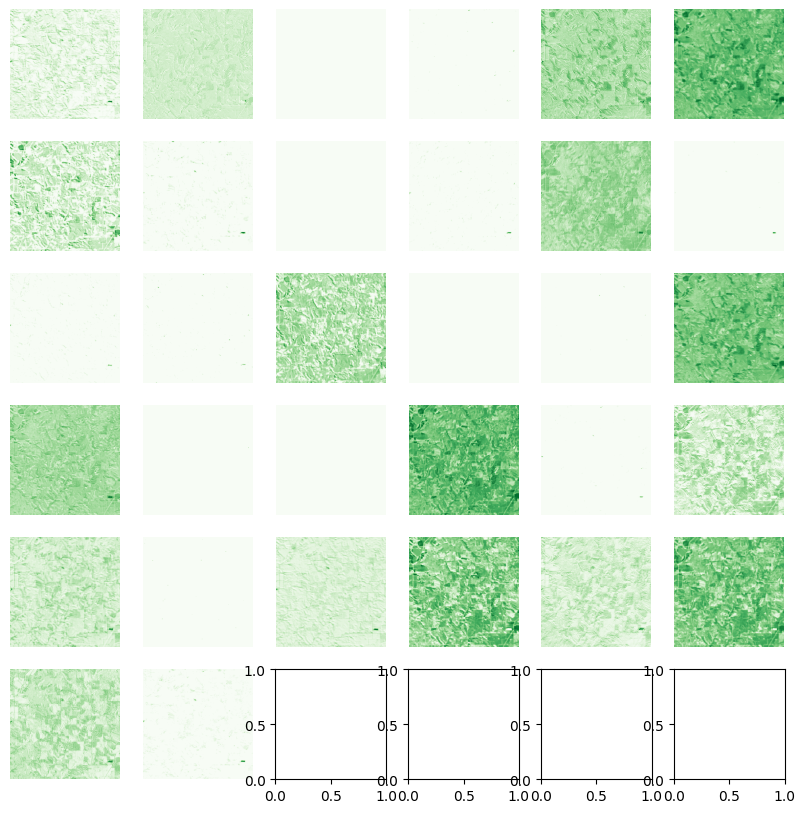

In [16]:
# model_id = "aanaxs4g" # With mask
model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]

# print(model_path)
cnn_model = models.load_model(model_path)
outputs = cnn_model.layers[0].output
# outputs = [i.output for i in cnn_model.layers]
model = Model(inputs=cnn_model.inputs, outputs=outputs)
# get feature map for first hidden layer
img_batch = np.expand_dims(img_nomask, axis=0)
feature_maps = model.predict(img_batch)
nrows = 6
ncols = 6
x_index = 0
y_index = 0
count = 0
fig,ax = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(32):
    # ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens",vmin = feature_maps[0].min(),vmax=feature_maps[0].max())
    ax[x_index,y_index].imshow(feature_maps[0][:,:,i],cmap="Greens")

    ax[x_index,y_index].axis("off")
    y_index += 1
    # print(x_index,y_index)
    if y_index >= 6:
        y_index =0
        x_index+=1

In [17]:
outputs = [i.output for i in cnn_model.layers]
model = Model(inputs=cnn_model.inputs, outputs=outputs)
# get feature map for first hidden layer
img_batch = np.expand_dims(img_nomask, axis=0)
feature_maps = model.predict(img_batch)

1/1 [==============================] - 0s 66ms/step


In [18]:
for layer in feature_maps:
    print(layer.shape)

(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 64)
(1, 62, 62, 64)
(1, 60, 60, 64)
(1, 30, 30, 64)
(1, 57600)
(1, 64)
(1, 32)
(1, 1)


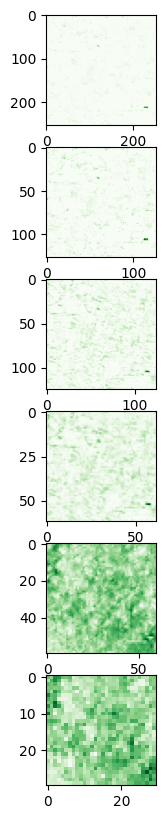

In [19]:
fig,ax = plt.subplots(6,figsize=(10,10))
count = 0
feature_maps_nomask = list()
for layer in feature_maps:
    if count > 5:
        break
    for i in layer:
        ax[count].imshow(i[:,:,-1],cmap="Greens")
        feature_maps_nomask.append(i[:,:,-1])
    count+=1

In [20]:
feature_map_list = np.array(feature_maps_masked + feature_maps_nomask,dtype=object)
feature_map_list.shape

(12,)

In [21]:
feature_list_flat = list()
for i in feature_map_list:
    i = i.flatten()
    feature_list_flat.extend(i)

In [22]:
len(feature_list_flat)

209228

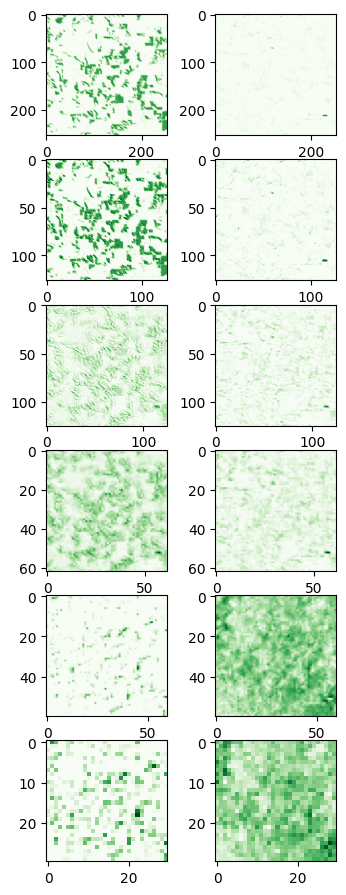

In [23]:
fig,ax = plt.subplots(6,2,figsize=(4,11))
for i in range(6):
    with_mask = feature_maps_masked[i]
    without_mask = feature_maps_nomask[i]
    # ax[i,0].imshow(with_mask,cmap="Greens",vmin=np.min(feature_list_flat),vmax=np.max(feature_list_flat))
    # ax[i,1].imshow(without_mask,cmap="Greens",vmin=np.min(feature_list_flat),vmax=np.max(feature_list_flat))
    ax[i,0].imshow(with_mask,cmap="Greens")
    ax[i,1].imshow(without_mask,cmap="Greens")

    # for i in layer:
    #     ax[count].imshow(i[:,:,0],cmap="Greens")
plt.savefig(os.path.join(out_dir,"feature_maps_last_plot_all_layers.png"))

# LIME

In [29]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random
import rasterio
from rasterio.plot import reshape_as_image
from tensorflow.keras import models

from LimeImageExplainer2 import LimeImageExplainer2


file = rasterio.open('Input/sentinel/patches_256/Iowa_July_1_31/test/Iowa_2021_july_1280-3072.tif')
img = reshape_as_image(file.read())
file.close()
img_batch = np.expand_dims(img, axis=0)
# model_id = "aanaxs4g" # With mask
model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]

# print(model_path)
cnn_model = models.load_model(model_path)

In [38]:
img_batch.shape

(1, 256, 256, 12)

In [33]:
# plt.imshow(img_batch[0][:,:,8])

In [30]:
explainer = LimeImageExplainer2(random_state=42)
explanation = explainer.explain_instance(
         img_batch,
         cnn_model.predict
)
# plt.imshow(img_batch[10])
# image, mask = explanation.get_image_and_mask(
#          cnn_model.predict(
#               img_batch).argmax(axis=1)[0],positive_only=True,hide_rest=False)
# plt.imshow(mark_boundaries(image, mask))

ValueError: only 2D color images are supported

# CAM

In [28]:
cnn_model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7fe990a3bd30>>